## Importations

In [2]:
## plots
import matplotlib.pyplot as plt
from matplotlib import rc

##
import seaborn as sns

import sys
sys.path.append('../')

## ML :
from scripts.machine_learning_utils import *
from scripts.models import *
from scripts.descriptors import *
from sklearn.feature_selection import SelectKBest, f_regression

rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)

## Get data

In [3]:
df_total = pd.read_csv('../tables/data/df_total.csv').set_index('SMILES')

df_OCO = df_total[df_total.group == 'OCO']
df_ONO = df_total[df_total.group == 'ONO']
df_NNN = df_total[df_total.group == 'NNN']
df_triarylboranes = df_total[df_total.group == "triarylboranes"]

In [4]:
df_ONO_train = pd.read_csv("../tables/data/ONO_train_set.csv").set_index('SMILES')
df_ONO_test = pd.read_csv("../tables/data/ONO_test_set.csv").set_index('SMILES')

## Benchmark models on test set 

In [5]:
df = pd.DataFrame(columns = dict_models.keys(), index = ["fingerprints", "rdkit", "quantum", "hammett"])

In [60]:
df

,Linear,LR,Bayes. Ridge,LASSO,SVR,Tree,RF,Grad. Boost.,GPR,KNN,MLP
fingerprints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rdkit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hammett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Y_train = df_ONO_train.FIA
Y_test = df_ONO_test.FIA
for descriptor in df.index :
    print('** '+ descriptor + ' **')
    X_train = create_descriptors(df_ONO_train.index, descriptor, structure = 'ONO')
    X_test = create_descriptors(df_ONO_test.index, descriptor, structure = 'ONO')
    if descriptor != 'fingerprints':
        for model in df.columns: 
            print(model)
            try : 
                score = evaluate_model_test_set(dict_models[model][descriptor], X_train, Y_train, X_test, Y_test)               
                MAE = abs(round(score,2))
                df.at[descriptor,model] = MAE
            except: df.at[descriptor, model] = "dv"
    elif descriptor == 'fingerprints':
        for model in df.columns: 
            print(model)
            try : 
                score = evaluate_model_test_set_fp(dict_models[model][descriptor], X_train, Y_train, X_test, Y_test)
                MAE = abs(round(score,2))
                df.at[descriptor,model] = MAE
            except: df.at[descriptor, model] = "dv"
            

** fingerprints **
Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP
** rdkit **
Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP


c:\Users\Juliette\miniconda3\envs\thesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


** quantum **
Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP
** hammett **
Linear
LR
Bayes. Ridge
LASSO
SVR
Tree
RF
Grad. Boost.
GPR
KNN
MLP


In [6]:
df

,Linear,LR,Bayes. Ridge,LASSO,SVR,Tree,RF,Grad. Boost.,GPR,KNN,MLP
fingerprints,10.62,10.15,10.16,14.42,10.58,17.48,14.44,10.77,9.94,19.87,10.22
rdkit,7.59,6.92,6.91,6.62,6.91,10.06,10.1,10.01,9.11,15.87,7.28
quantum,7.02,7.2,7.18,6.96,8.21,14.21,10.78,7.81,12.85,13.07,7.07
hammett,6.15,6.14,6.24,6.96,7.41,21.56,13.52,6.2,9.11,15.05,6.14


In [63]:
df.index = ["Fingerprints", "RDKit", "Quantum", "Hammett-extended"]
df.index.name = "Descriptors"

In [64]:
df

,Linear,LR,Bayes. Ridge,LASSO,SVR,Tree,RF,Grad. Boost.,GPR,KNN,MLP
Descriptors,,,,,,,,,,,
Fingerprints,10.62,10.15,10.16,14.42,10.58,17.48,14.4,11.2,9.94,19.87,10.19
RDKit,7.59,6.92,6.91,6.62,6.91,10.06,9.72,10.01,9.11,15.87,7.28
Quantum,7.02,7.2,7.18,6.96,8.21,14.21,10.45,7.81,12.85,13.07,7.06
Hammett-extended,6.15,6.14,6.24,6.96,7.41,21.56,13.65,6.2,9.11,15.05,6.15


In [65]:
df.to_csv('../results/benchmark_ML_models_descriptors/table_models_eval_ONO_on_test_set.csv')

In [66]:
df = pd.read_csv('../results/benchmark_ML_models_descriptors/table_models_eval_ONO_on_test_set.csv').set_index('Descriptors')

### Evaluate models on all database for quantum descriptors only (for Lewis acidity interpretability)

In [ ]:
Y = df_total.FIA
X = create_descriptors(df_total.index, "quantum", data = data_Q_tot)


In [ ]:
        df = pd.DataFrame(columns = dict_models.keys(), index = ["MAE (kJ/mol)"])
        for model in df.columns: 
            print(model)
            try : 
                scores = evaluate_model(dict_models[model]["quantum"], X,Y)
                for i,elt in enumerate(scores) : 
                    if elt < -100:
                        scores = np.delete(scores,[0,i])
                        print('split diverged')
                MAE = abs(round(np.mean(scores),2))
                df.at["MAE (kJ/mol)",model] = MAE
            except: df.at["MAE (kJ/mol)", model] = "dv"

Linear
Ridge
Bayes. Ridge
Lasso
SVR
Tree
RF
GB
GPR
KNN
MLP


In [ ]:
df_total_perf_models = df

In [ ]:
df_total_perf_models.to_excel('article/tables/table_models_eval_quantum_features.xlsx')

##### evaluate models on all database with uncorrelated features

In [ ]:
uncorrelated_features = ['H', 'dipole', 'molar_volume', 'H_thermal_correction', 'electronegativity', 'hardness', "APT_charge", "NPA_charge", "NPA_Rydberg", 'NPA_core', 'NMR_shift', 'X']
names = get_names('quantum')
df_X = pd.DataFrame(X)
df_X.columns = names
df_X_uncor = df_X.loc[:,uncorrelated_features]
X_uncor = np.array(df_X_uncor)

In [ ]:
        df_uncor = pd.DataFrame(columns = dict_models.keys(), index = ["MAE (kJ/mol)"])
        for model in df.columns: 
            print(model)
            try : 
                scores = evaluate_model(dict_models[model]["quantum"], X_uncor,Y)
                for i,elt in enumerate(scores) : 
                    if elt < -100:
                        scores = np.delete(scores,[0,i])
                        print('split diverged')
                MAE = abs(round(np.mean(scores),2))
                df_uncor.at["MAE (kJ/mol)",model] = MAE
            except: df_uncor.at["MAE (kJ/mol)", model] = "dv"

Linear
Ridge
Bayes. Ridge
Lasso
SVR
Tree
RF
GB
GPR
KNN
MLP


In [ ]:
df_uncor.to_excel('article/tables/table_models_eval_quantum_uncor_features.xlsx')

### Plot heatmap

In [ ]:
df_eval = pd.read_csv('../results/benchmark_ML_models_descriptors/table_models_eval_ONO_on_test_set.csv')
df_eval = df_eval.set_index('Descriptors')

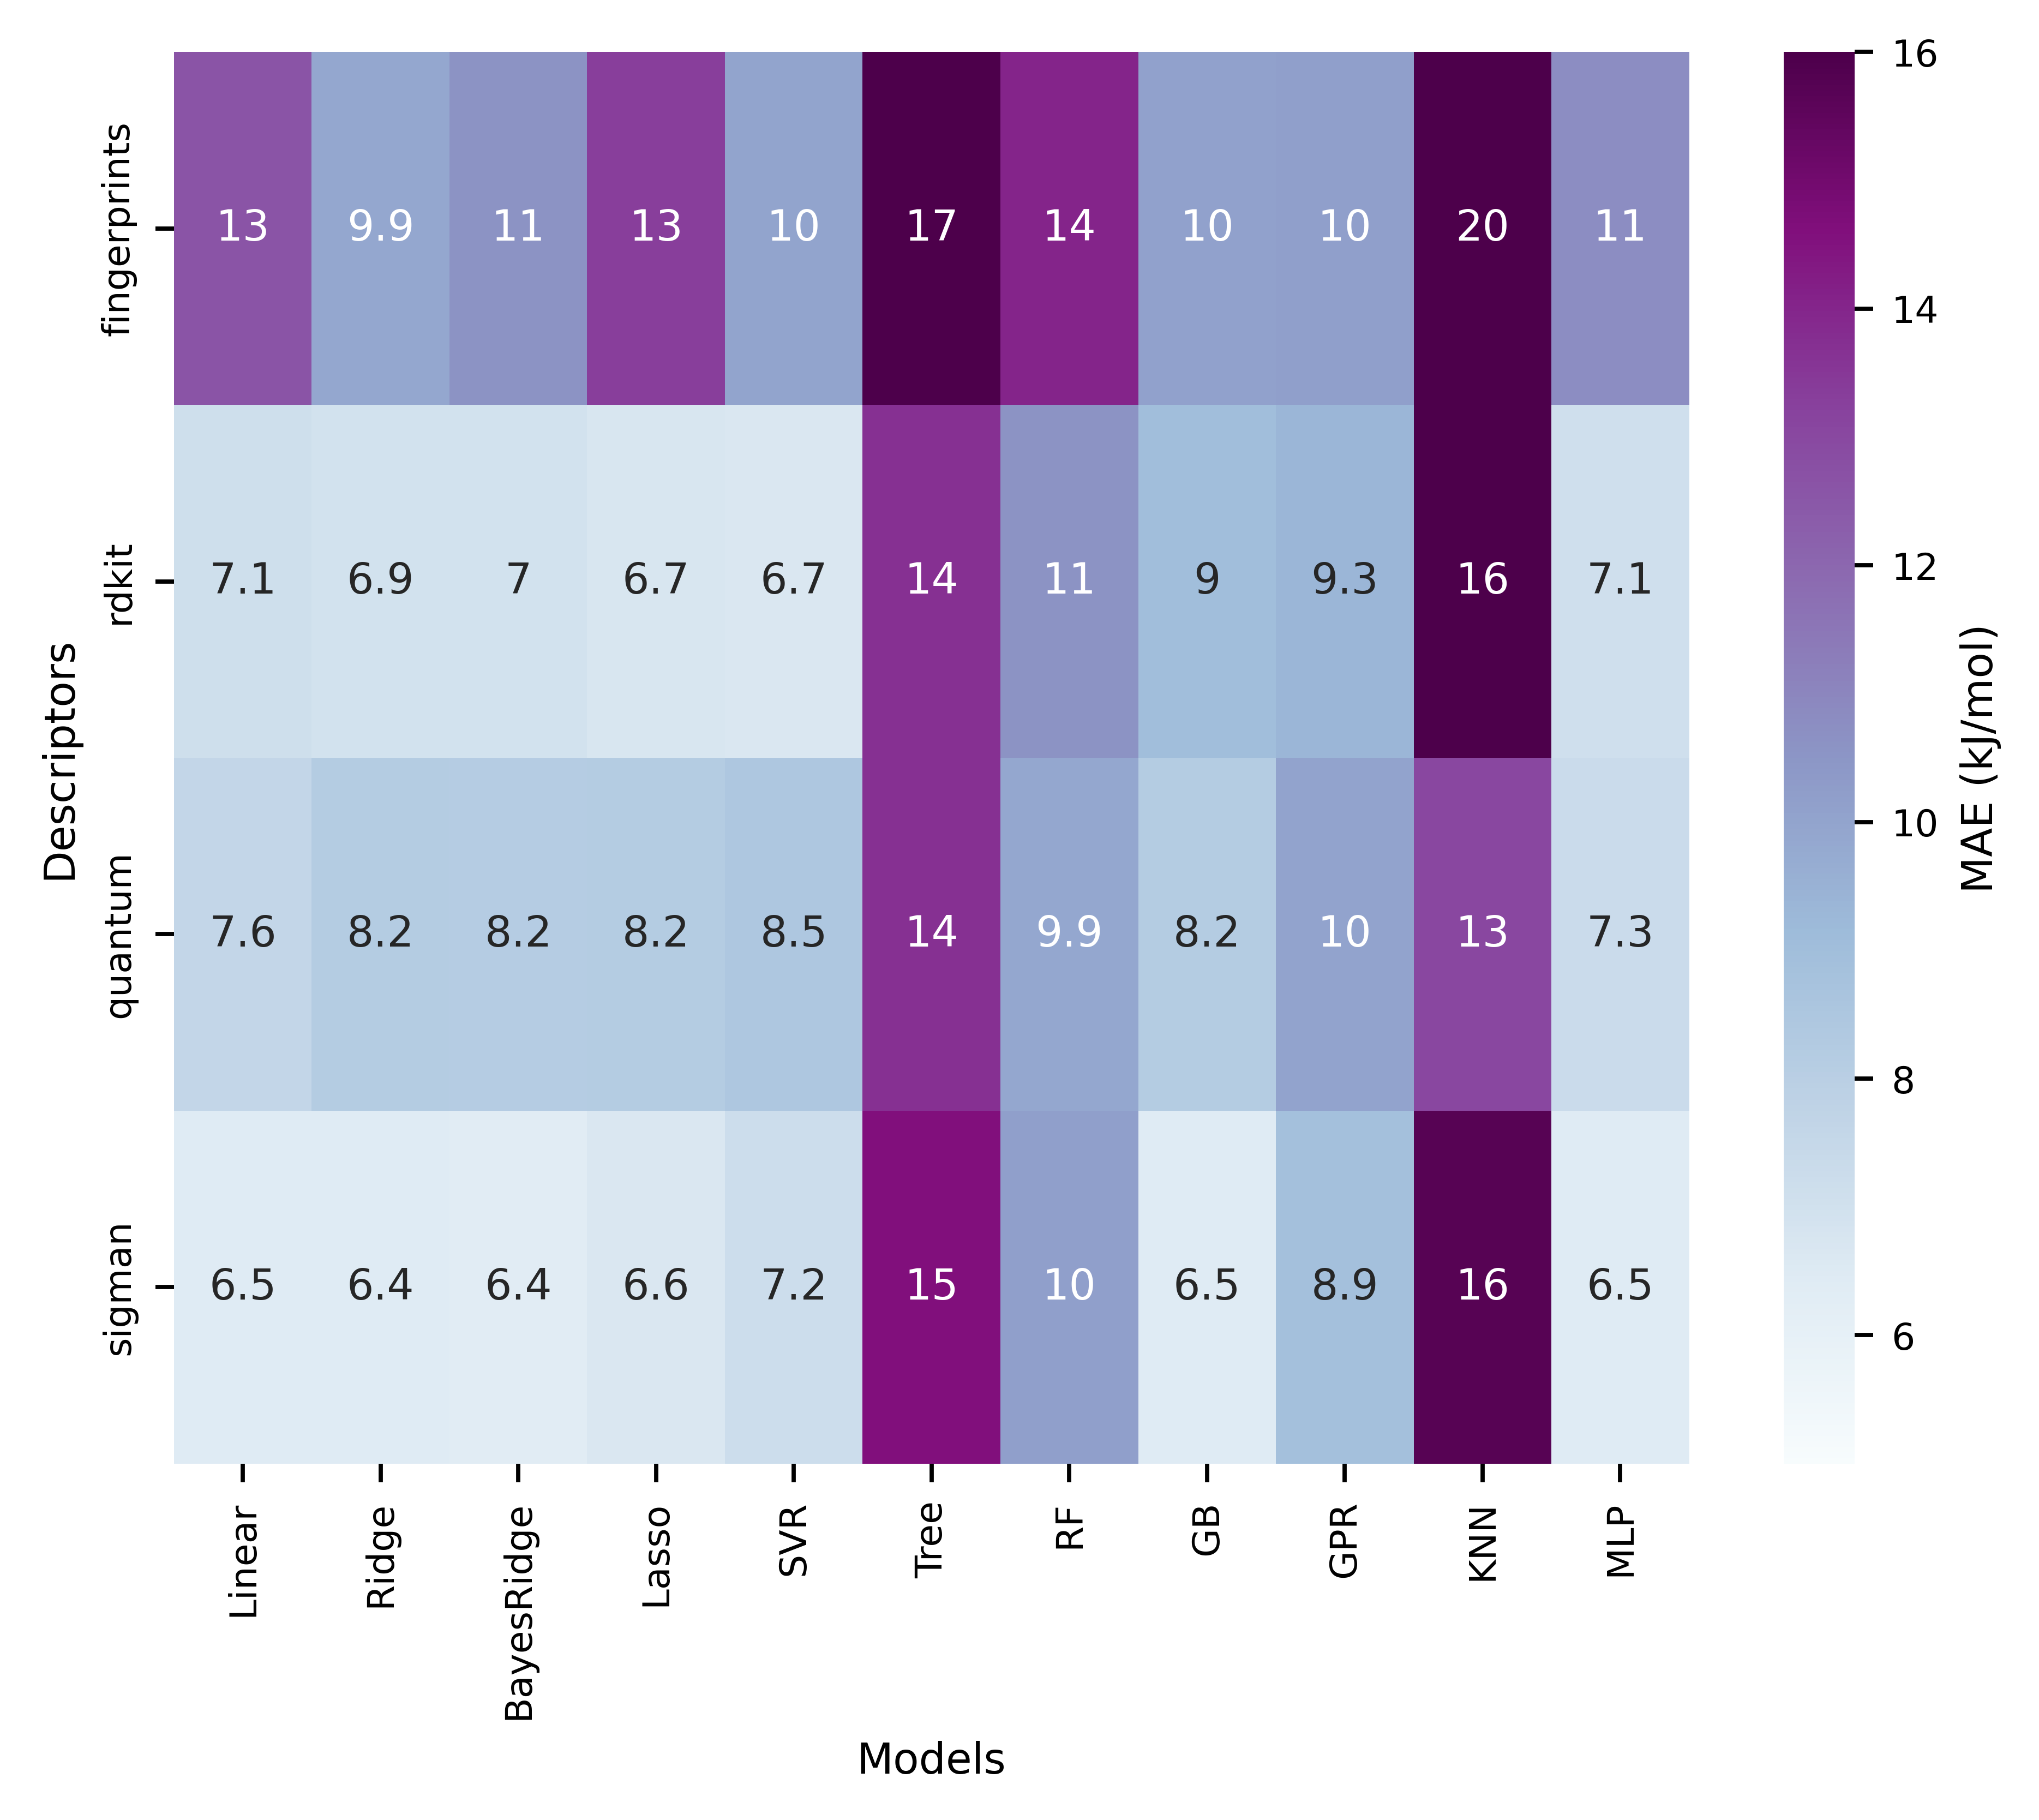

In [ ]:
ax_heatmap = sns.heatmap(df_eval, annot = True, cmap = "BuPu", vmin = 5, vmax = 16)
ax_heatmap.set(xlabel = 'Models')
cbar = ax_heatmap.collections[0].colorbar
cbar.set_label('MAE (kJ/mol)')


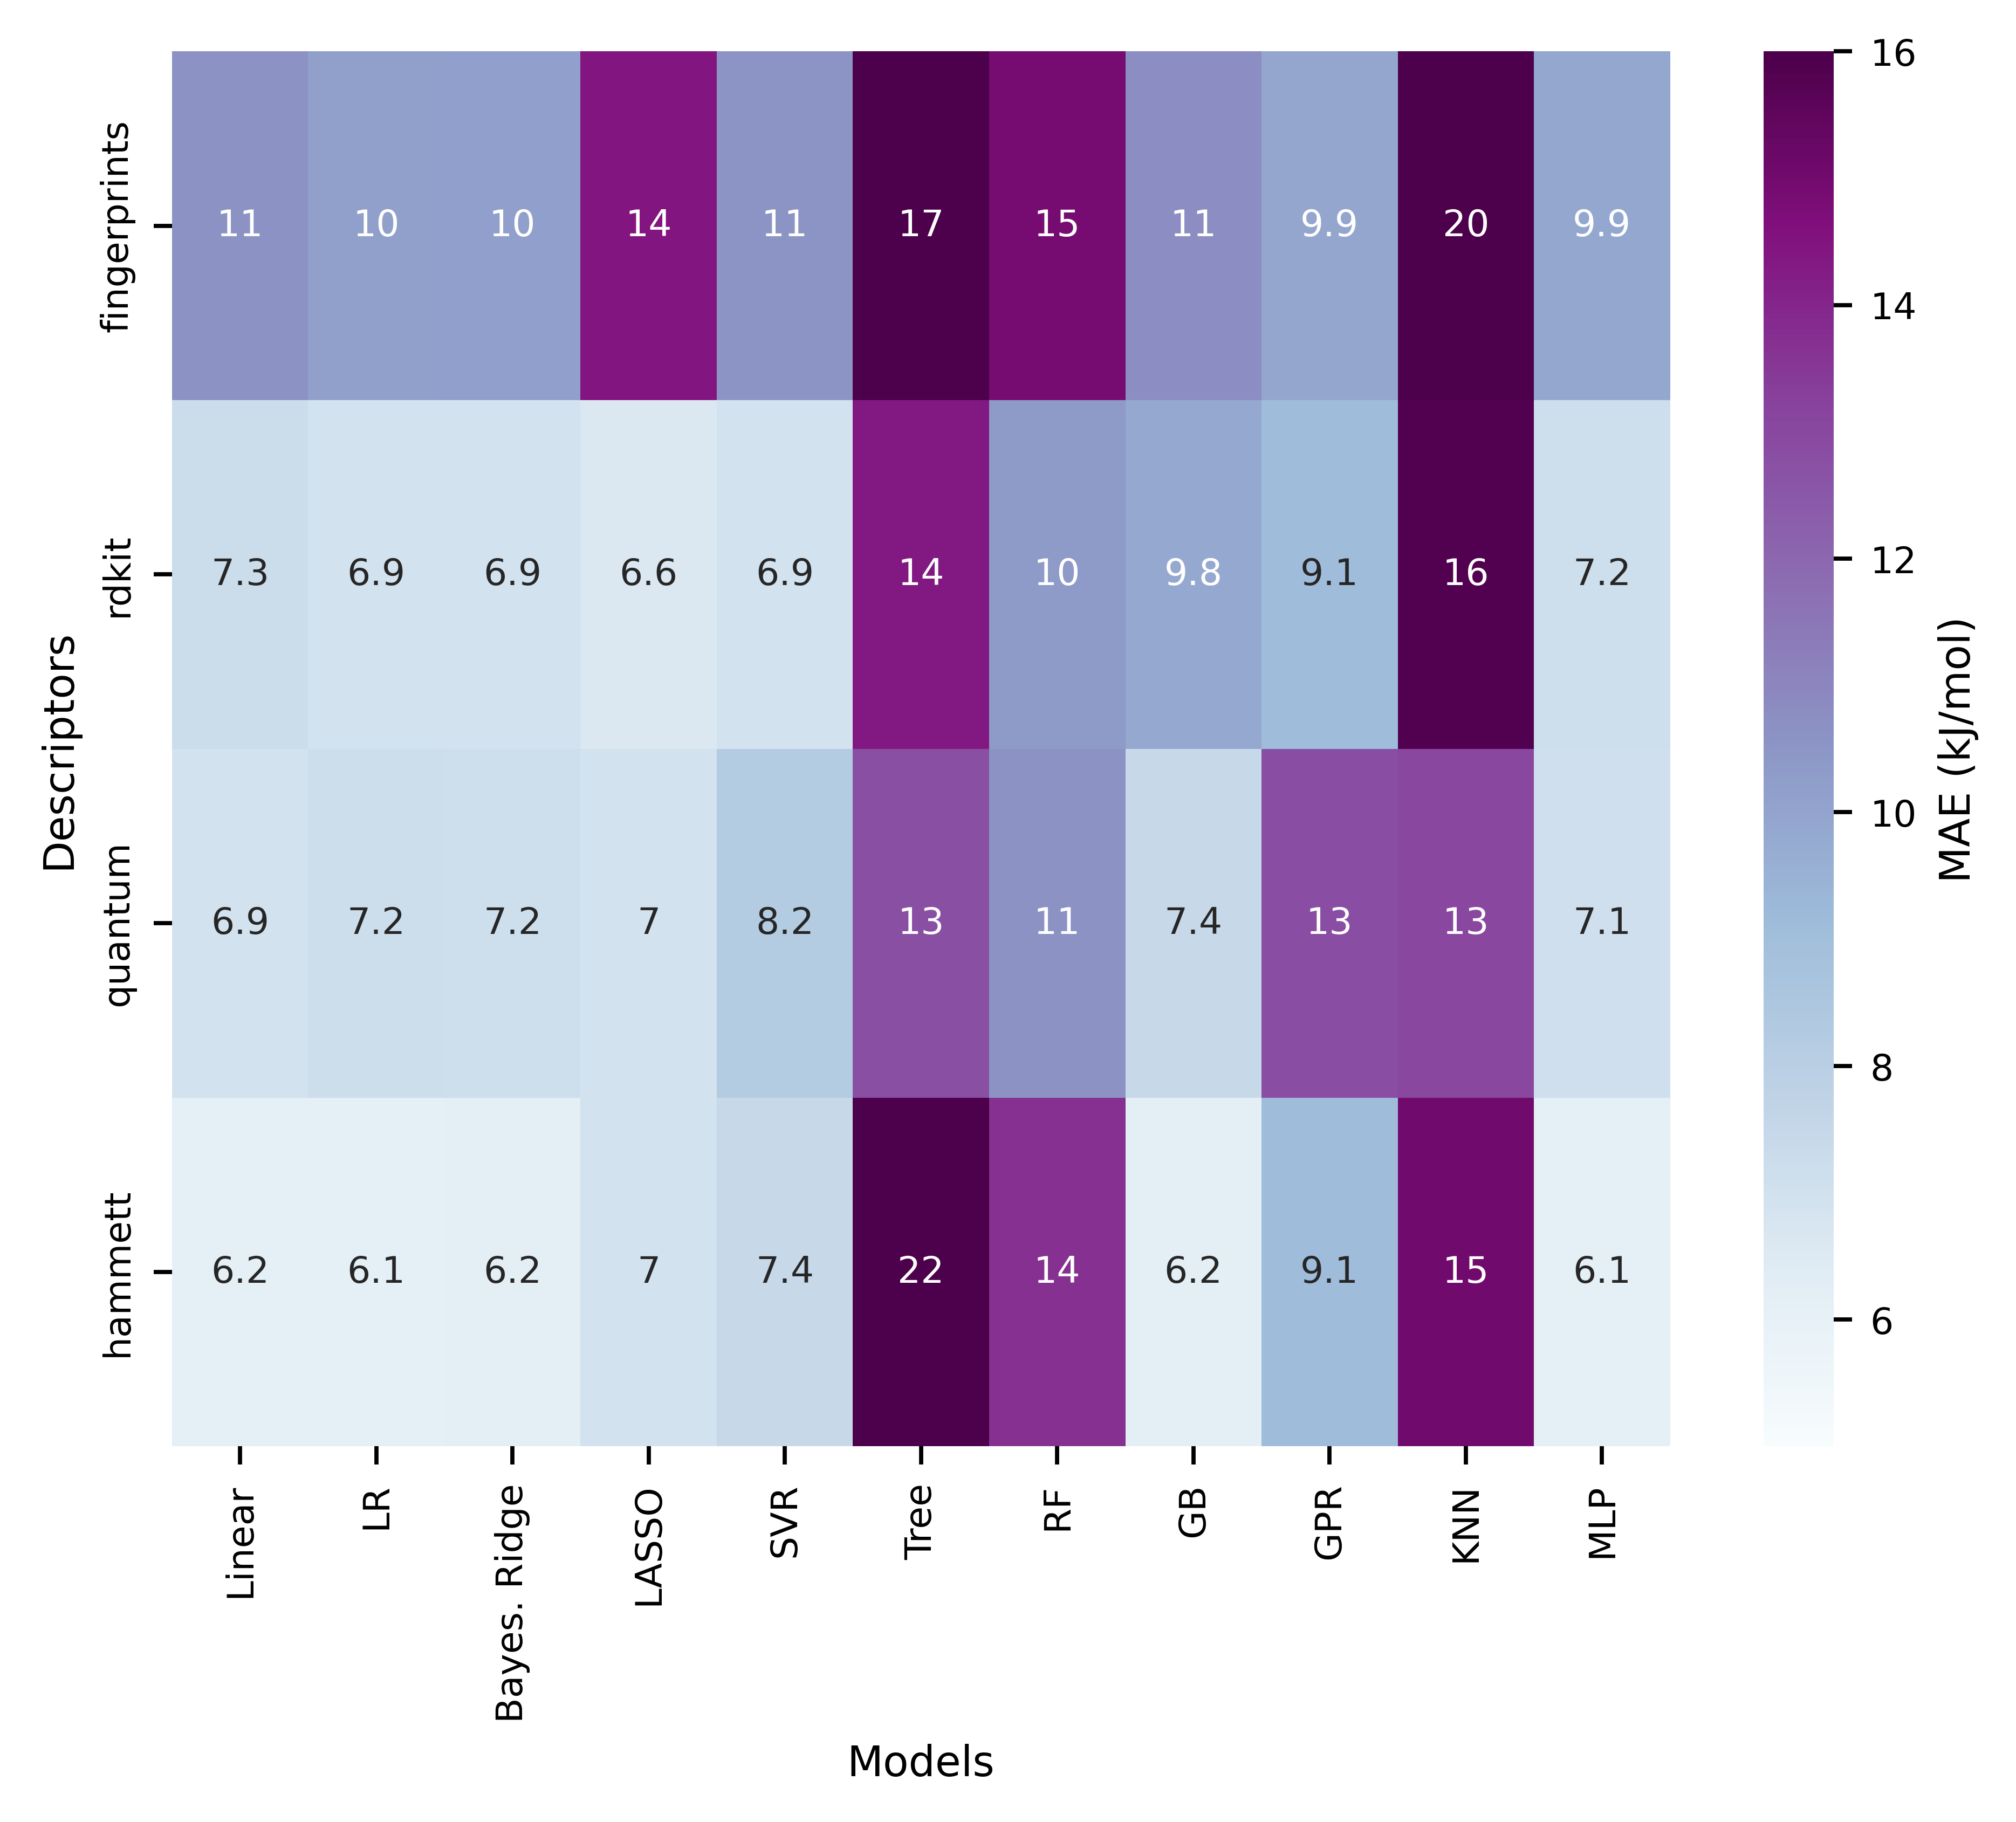

In [ ]:
ax_heatmap = sns.heatmap(df_eval, annot = True, cmap = "BuPu", vmin = 5, vmax = 16)
ax_heatmap.set(xlabel = 'Models')
cbar = ax_heatmap.collections[0].colorbar
cbar.set_label('MAE (kJ/mol)')


## Boxplots

Linear Ridge (LR) for different descriptors

In [70]:
descriptors_names = ["Fingerprints", "RDKit", "Quantum", "Hammett-extended", "select. RDKit \n & Hammett-extended"]

In [12]:
Y = df_ONO_train.FIA
descriptors = ['fingerprints', 'rdkit', 'quantum', 'hammett']
MAEs=[]
for descriptor in descriptors :
    print('** '+ descriptor + ' **')
    X = create_descriptors(df_ONO_train.index, descriptor, data = data_Q_tot, structure = 'ONO')
    scores = evaluate_model(dict_models['LR'][descriptor], X,Y)
    MAEs.append(np.absolute(scores))
X_rdkit_train = create_descriptors(df_ONO_train.index, "rdkit")
X_hammett_train = create_descriptors(df_ONO_train.index, "hammett", structure = 'ONO')
X_rdkit_hammett_ONO_train = np.concatenate((X_rdkit_train, X_hammett_train), axis = 1)
f_selector = SelectKBest(f_regression, k = 126)
f_selector.fit(X_rdkit_hammett_ONO_train, Y)
X_train = f_selector.transform(X_rdkit_hammett_ONO_train) 
scores = evaluate_model(Ridge(alpha=0.7, solver='sparse_cg', tol=1e-06), X_train,Y)
MAEs.append(np.absolute(scores))

** fingerprints **
** rdkit **
** quantum **
** hammett **


In [13]:
df=pd.DataFrame(MAEs)
df.index = descriptors_names
df = df.rename_axis("Descriptors")


In [80]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Descriptors,,,,,,,,,,,,,,,,,,,,,
Fingerprints,13.126090,16.617670,17.131402,12.707721,17.164018,13.119397,15.459796,14.264534,13.954652,11.950191,...,16.834129,17.516449,18.357929,13.526849,11.964789,13.484786,17.566121,12.085409,13.832697,14.201170
RDKit,6.169761,8.699808,8.336019,8.472372,6.541211,5.062404,6.971989,9.053700,4.996052,8.768457,...,6.254572,6.391059,8.415484,6.284459,6.603761,9.923960,6.162431,7.137683,6.547960,7.141538
Quantum,5.897668,8.168493,12.640969,5.931609,6.770153,9.722893,7.959726,8.947515,8.393402,9.948576,...,6.598192,9.508221,9.091908,9.909767,7.008666,7.651037,7.676786,9.669467,9.191614,9.063615
Hammett-extended,6.774719,5.731290,5.951030,5.567095,7.932999,4.923505,6.642600,5.894791,9.586931,8.267047,...,5.539026,8.572139,7.075614,5.506473,5.965880,6.962600,4.478785,6.887764,9.141747,6.541422
select. RDKit \n & Hammett-extended,6.178447,4.732035,9.015218,7.510684,6.043518,4.683974,6.403454,5.588087,6.331441,7.659644,...,4.794793,7.548406,5.393361,7.121698,6.181516,6.565618,6.777205,8.288574,6.725072,5.360792


In [78]:
df.to_csv('../results/benchmark_ML_models_descriptors/MAEs_Ridge_descriptors.csv')

In [79]:
df=pd.read_csv('../results/benchmark_ML_models_descriptors/MAEs_Ridge_descriptors.csv').set_index('Descriptors')

MAE for best model (oracle) on train set : 6.535660668320226


{'whiskers': [<matplotlib.lines.Line2D at 0x2998cd04550>,
 'caps': [<matplotlib.lines.Line2D at 0x2998ccefc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2998cd047c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2998cde8130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2998cde94e0>],
 'means': [<matplotlib.lines.Line2D at 0x2998cde9240>]}

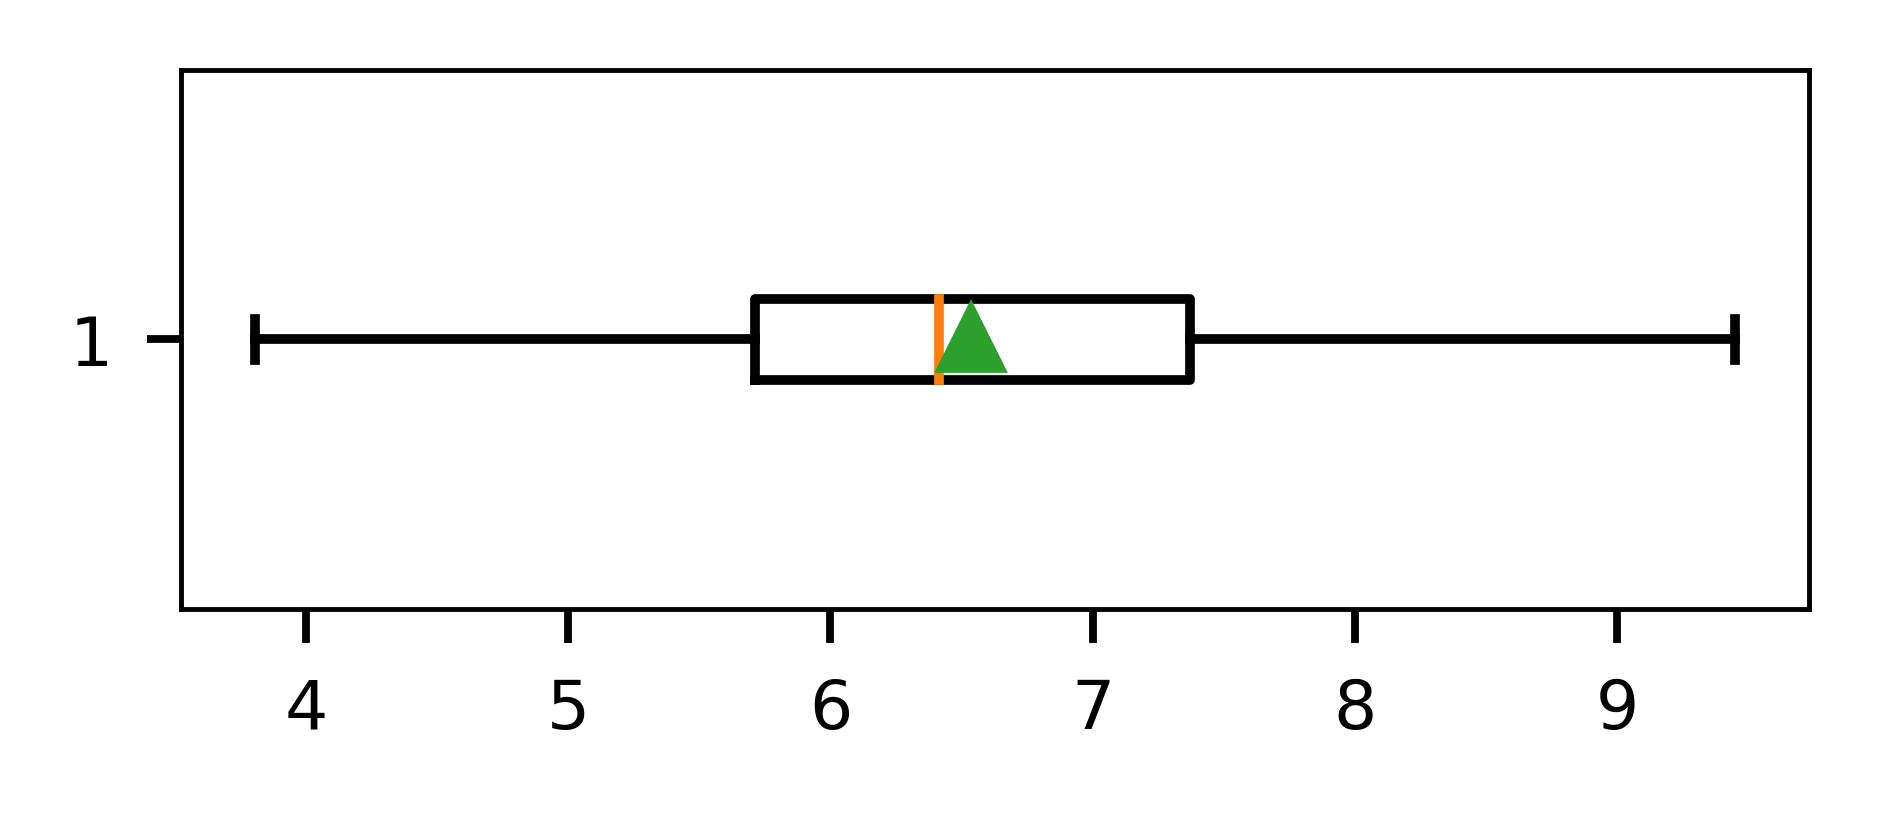

In [17]:
print('MAE for best model (oracle) on train set :', np.mean(df.loc['select. RDKit & Hammett-extended']))
fig = plt.figure(figsize=(3,1))
ax = fig.subplots()

ax.boxplot(df.loc['select. RDKit & Hammett-extended'], showmeans=True, vert = False)

Text(0, 0.5, 'MAE distributions')

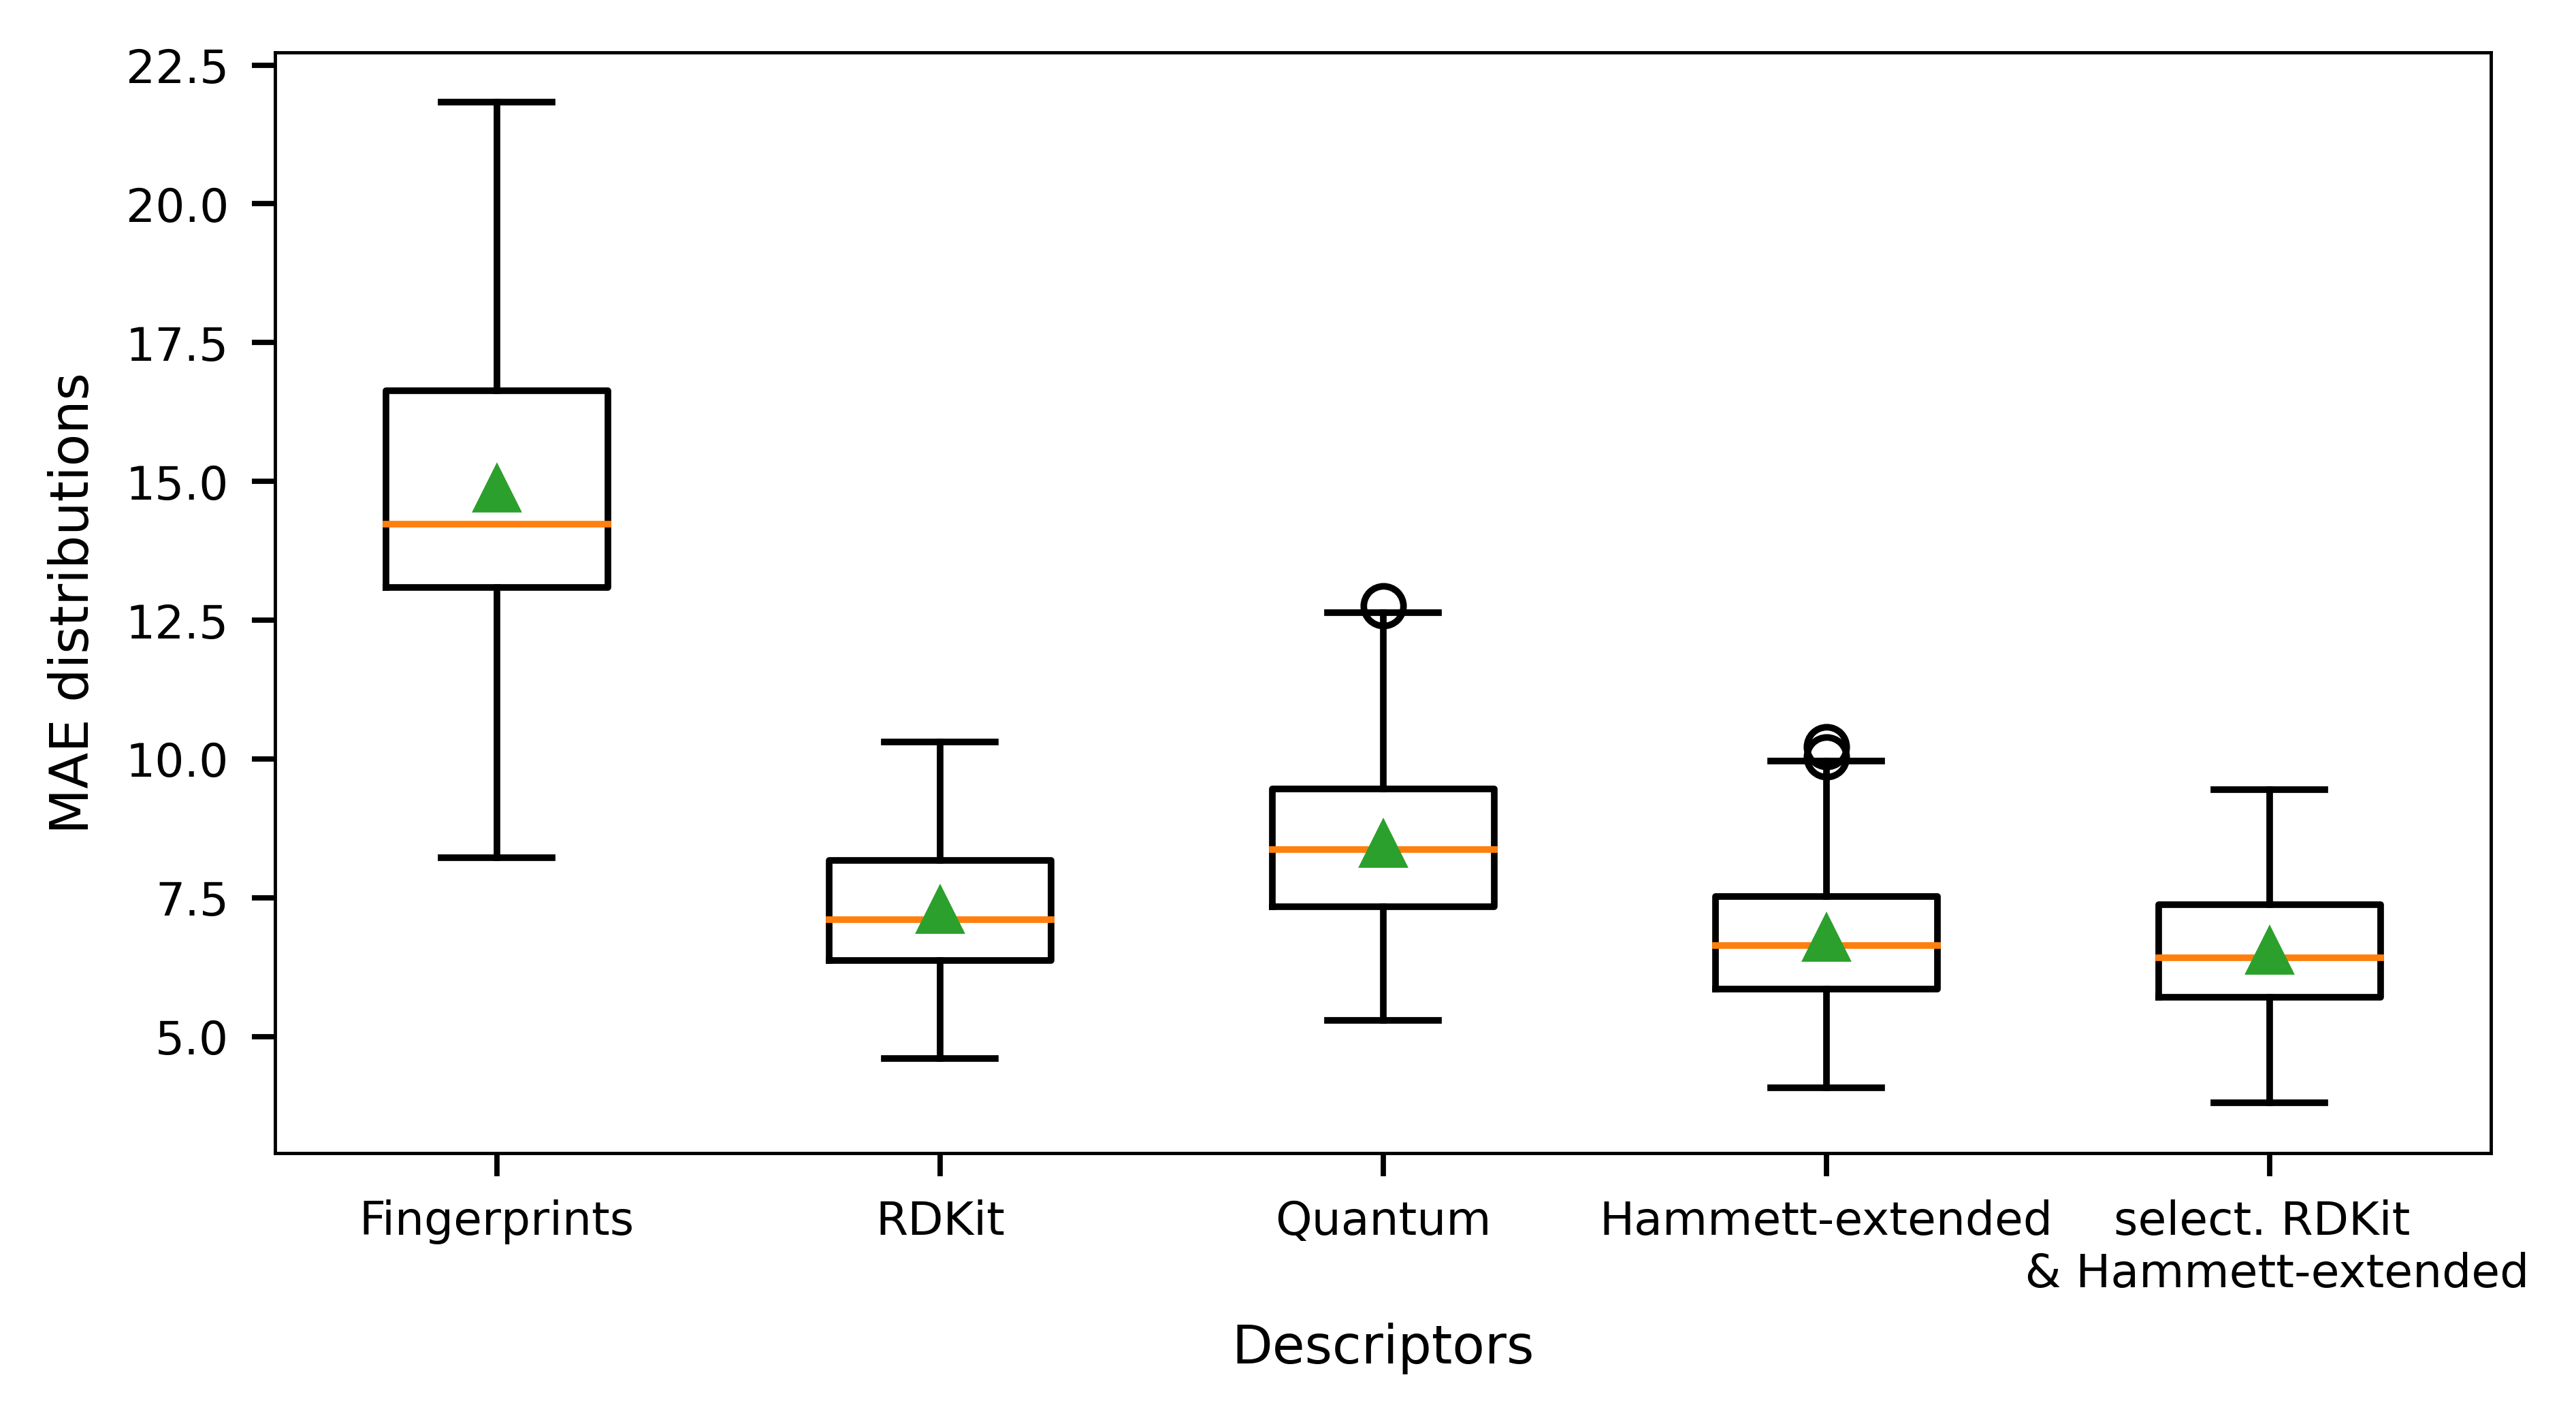

In [73]:
descriptors=df.index
MAEs=[]
for desc in descriptors:
    MAEs.append(df.loc[desc])

fig = plt.figure(figsize=(6,3))
ax = fig.subplots()

ax.boxplot(MAEs, labels=descriptors, showmeans=True, vert = True)

#ax.tick_params(axis = 'x',rotation=45)
ax.set_xlabel('Descriptors')
ax.set_ylabel('MAE distributions')

Descriptors fixed for different models

In [6]:
Y = df_ONO_train.FIA
models = list(dict_models.keys())
MAEs=[]
X = create_descriptors(df_ONO_train.index, 'hammett', data = data_Q_tot, structure = 'ONO')
for model in models :
    print('** '+ model + ' **')    
    scores = evaluate_model(dict_models[model]['hammett'], X,Y)
    MAEs.append(np.absolute(scores))

** Linear **
** LR **
** Bayes. Ridge **
** LASSO **
** SVR **
** Tree **
** RF **
** Grad. Boost. **
** GPR **
** KNN **
** MLP **


In [7]:
models = list(models)

In [8]:
df = pd.DataFrame(MAEs)

In [9]:
df.index = models
df = df.rename_axis('Models')

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Models,,,,,,,,,,,,,,,,,,,,,
Linear,6.948069,5.211611,5.514842,5.981138,5.359847,5.739482,6.759206,9.988356,8.844590,8.616622,...,4.688052,5.733034,7.253441,6.888468,5.848579,7.196043,8.207111,8.028727,7.422568,6.962695
LR,8.173019,7.007542,4.819371,8.413187,6.513832,5.963243,5.388310,8.454995,6.914892,6.267726,...,7.061687,6.377604,5.030696,6.676640,7.478434,8.665573,6.545951,6.136169,6.259802,6.332802
Bayes. Ridge,5.522684,8.278750,5.792831,8.710202,5.815132,5.231743,6.728716,7.359462,5.488286,5.574554,...,6.473078,6.954985,8.770561,6.351010,6.272894,6.558772,5.326104,5.236844,7.072029,7.495522
LASSO,6.379235,6.999146,6.667993,6.243923,6.019900,6.703390,5.703404,6.129734,8.493904,8.578053,...,5.007594,5.991775,5.575027,8.756290,8.205262,4.545405,8.686411,7.056018,7.410046,7.767341
SVR,9.196649,7.375227,8.101820,11.828550,6.303012,7.235341,6.409945,6.296908,6.310754,6.747262,...,7.745568,6.796674,7.973087,6.872167,6.454803,6.666378,8.618027,8.226652,6.680331,7.695022
Tree,13.820344,13.718627,13.165629,20.083921,19.348460,17.282850,14.688593,21.045628,20.682421,13.478431,...,20.997212,14.409361,15.595351,15.424017,13.611333,16.455583,15.735623,20.693330,18.184228,17.794482
RF,10.983654,10.492770,8.244677,8.295808,9.222239,14.347047,15.114641,9.969486,15.077012,11.393428,...,9.121776,9.226697,10.306910,11.292992,8.042155,12.165436,13.416349,17.483598,9.400577,10.761298
Grad. Boost.,9.131665,6.734324,6.216887,7.777762,7.494269,6.925897,4.444242,6.790867,5.219701,6.470742,...,5.952425,7.943361,8.438932,5.304539,5.414776,5.287390,5.679831,10.507044,6.227419,6.768851
GPR,7.563846,8.621846,11.335785,7.814170,9.491662,7.226924,8.286419,8.166131,7.752705,8.497076,...,7.668621,9.368292,10.591236,6.354823,9.971458,8.715437,4.745268,11.837822,7.880872,8.602909


In [11]:
for c in df.columns:
    if df.at['Linear', c] > 20 : 
        print(df.at['Linear', c])
        df.at['Linear', c] = None

In [12]:
df.to_csv('../results/benchmark_ML_models_descriptors/MAEs_hammett_models.csv')

C:\Users\Juliette\AppData\Local\Temp\ipykernel_4620\1998788618.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(MAEs, labels=models, showmeans=True, vert = True)


Text(0, 0.5, 'MAE distributions')

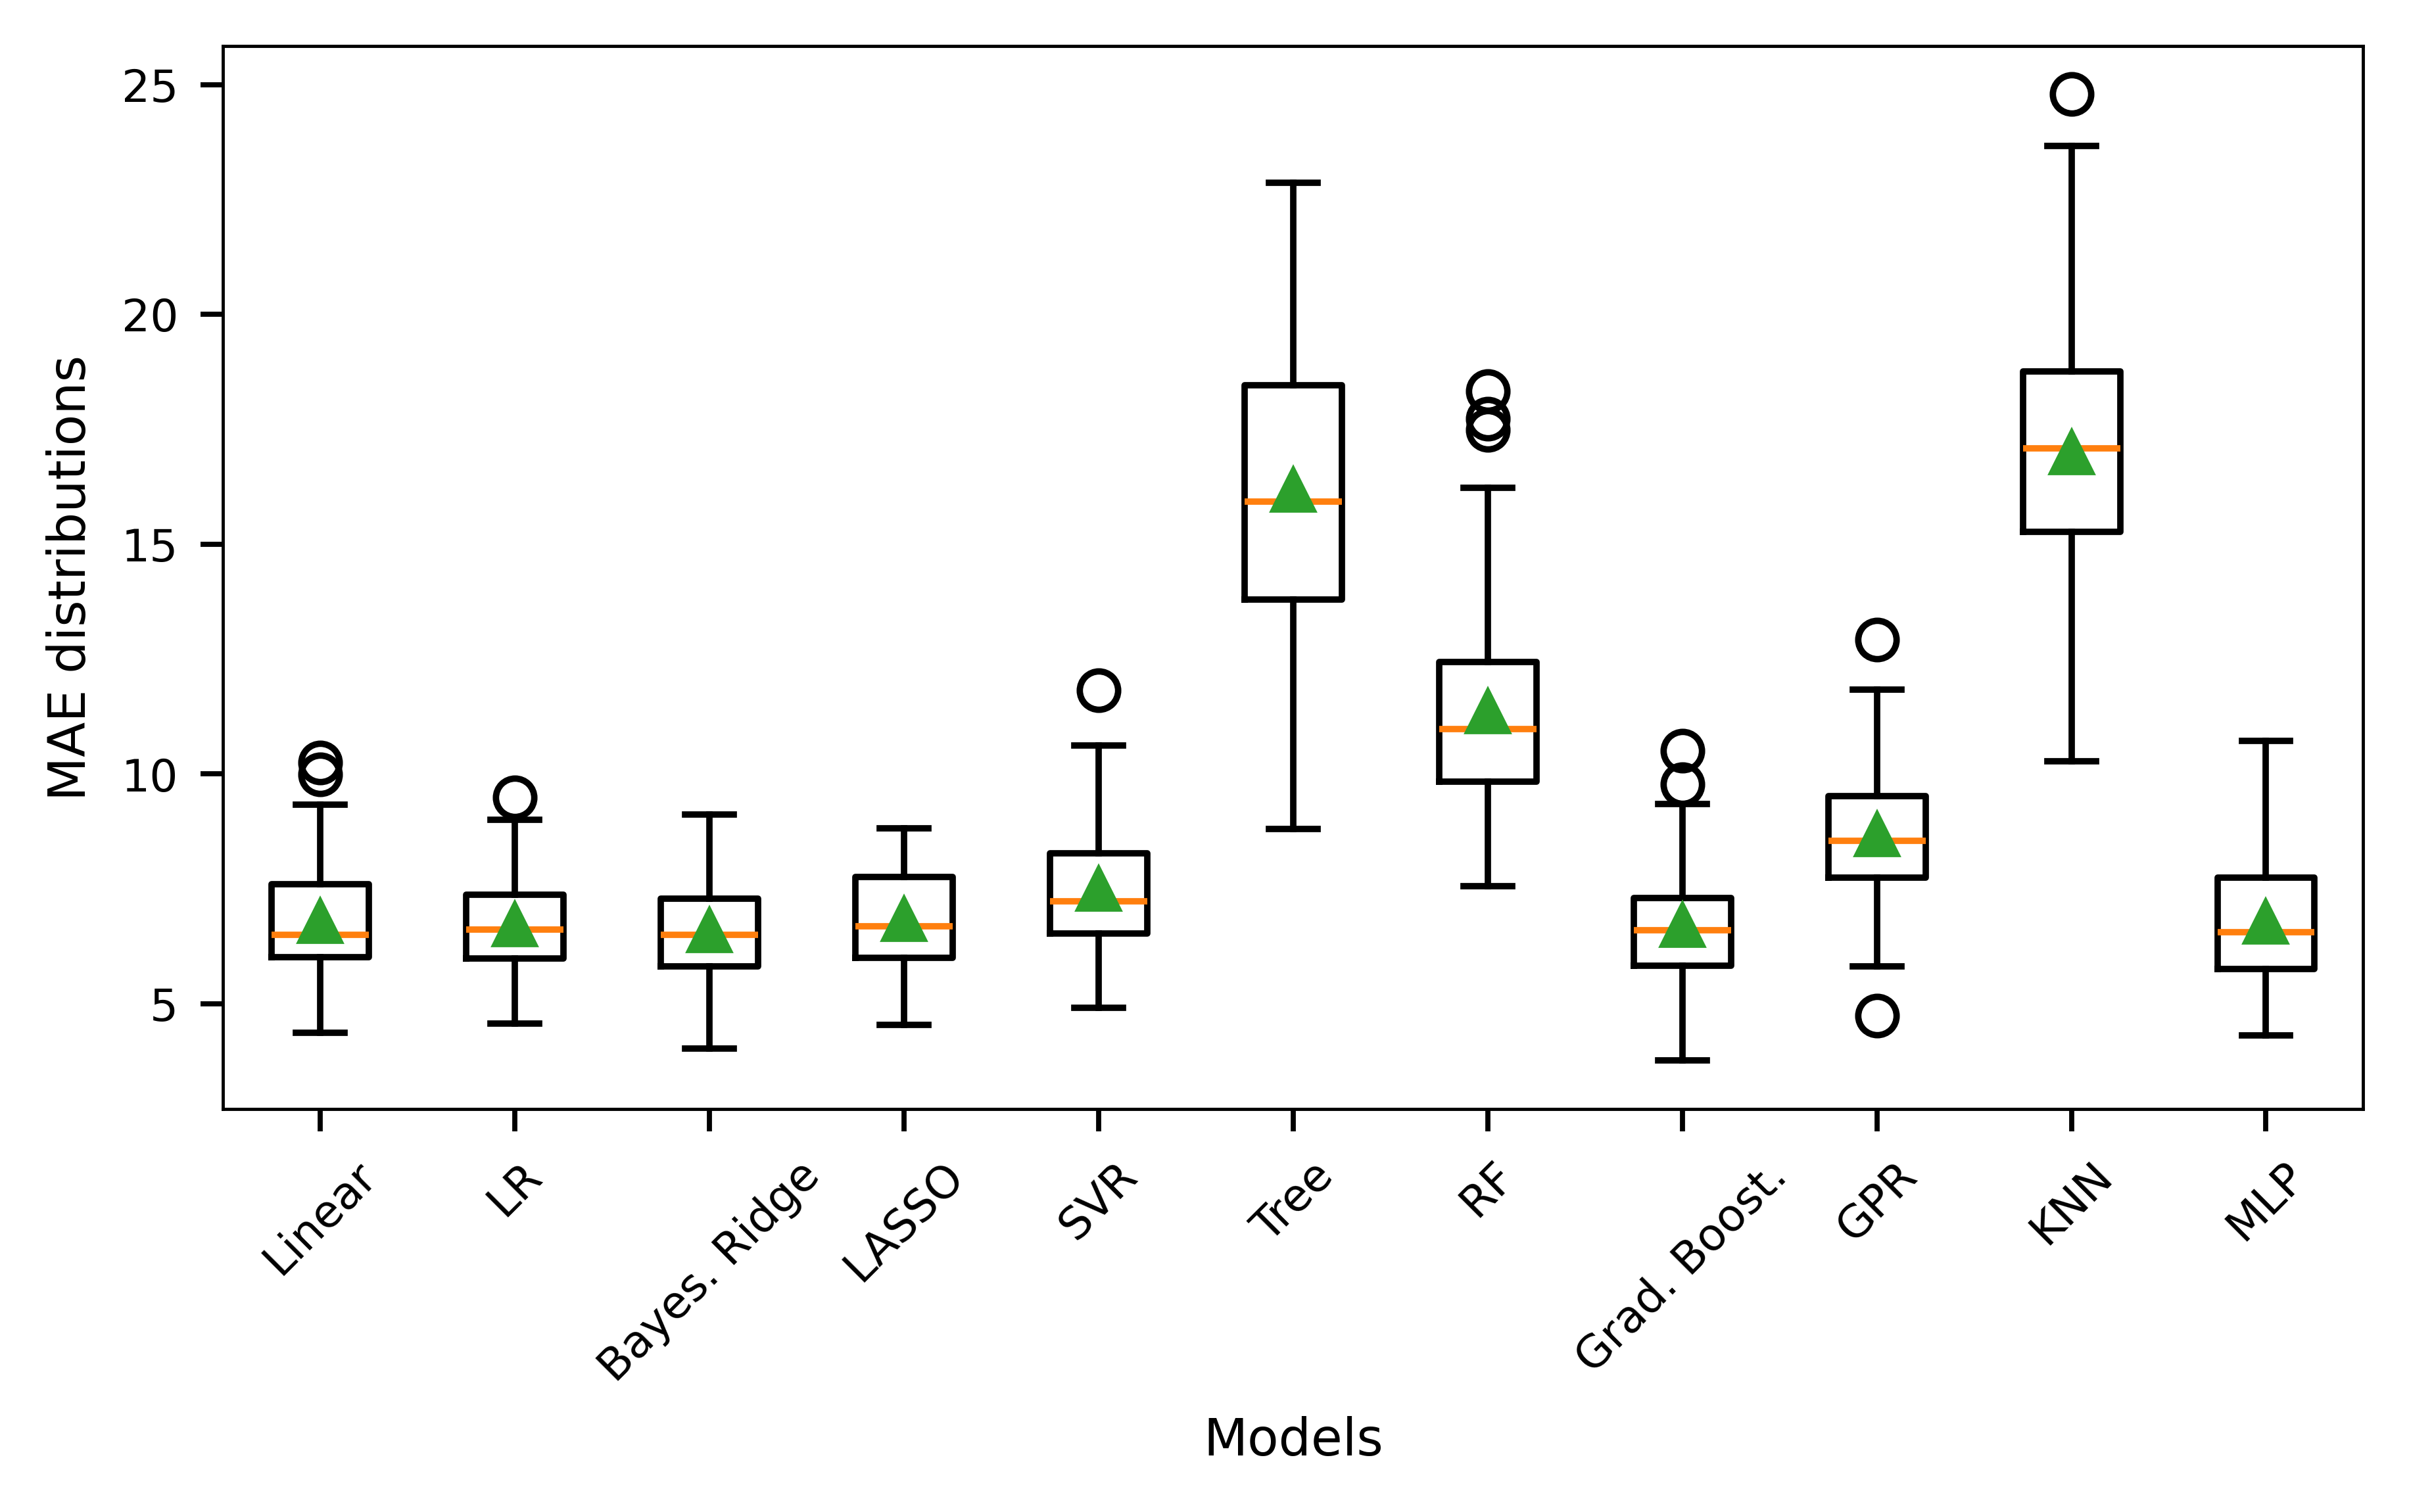

In [13]:
##ridge and various descriptors

df = pd.read_csv('../results/benchmark_ML_models_descriptors/MAEs_hammett_models.csv').set_index('Models')
models=df.index
MAEs=[]
for model in models:
    MAEs.append(df.loc[model])

fig = plt.figure(figsize=(6,3))
ax = fig.subplots()

ax.boxplot(MAEs, labels=models, showmeans=True, vert = True)

ax.tick_params(axis = 'x',rotation=45)
ax.set_xlabel('Models')
ax.set_ylabel('MAE distributions')



## Global figure

In [14]:
df_eval = pd.read_csv('../results/benchmark_ML_models_descriptors/table_models_eval_ONO_on_test_set.csv')
df_eval = df_eval.set_index('Descriptors')

C:\Users\Juliette\AppData\Local\Temp\ipykernel_4620\1452264758.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax2.boxplot(MAEs, labels=descriptors, showmeans=True, vert = True,
C:\Users\Juliette\AppData\Local\Temp\ipykernel_4620\1452264758.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax3.boxplot(MAEs, labels=models, showmeans=True, vert = True, boxprops = boxprops, whiskerprops = whiskerprops,


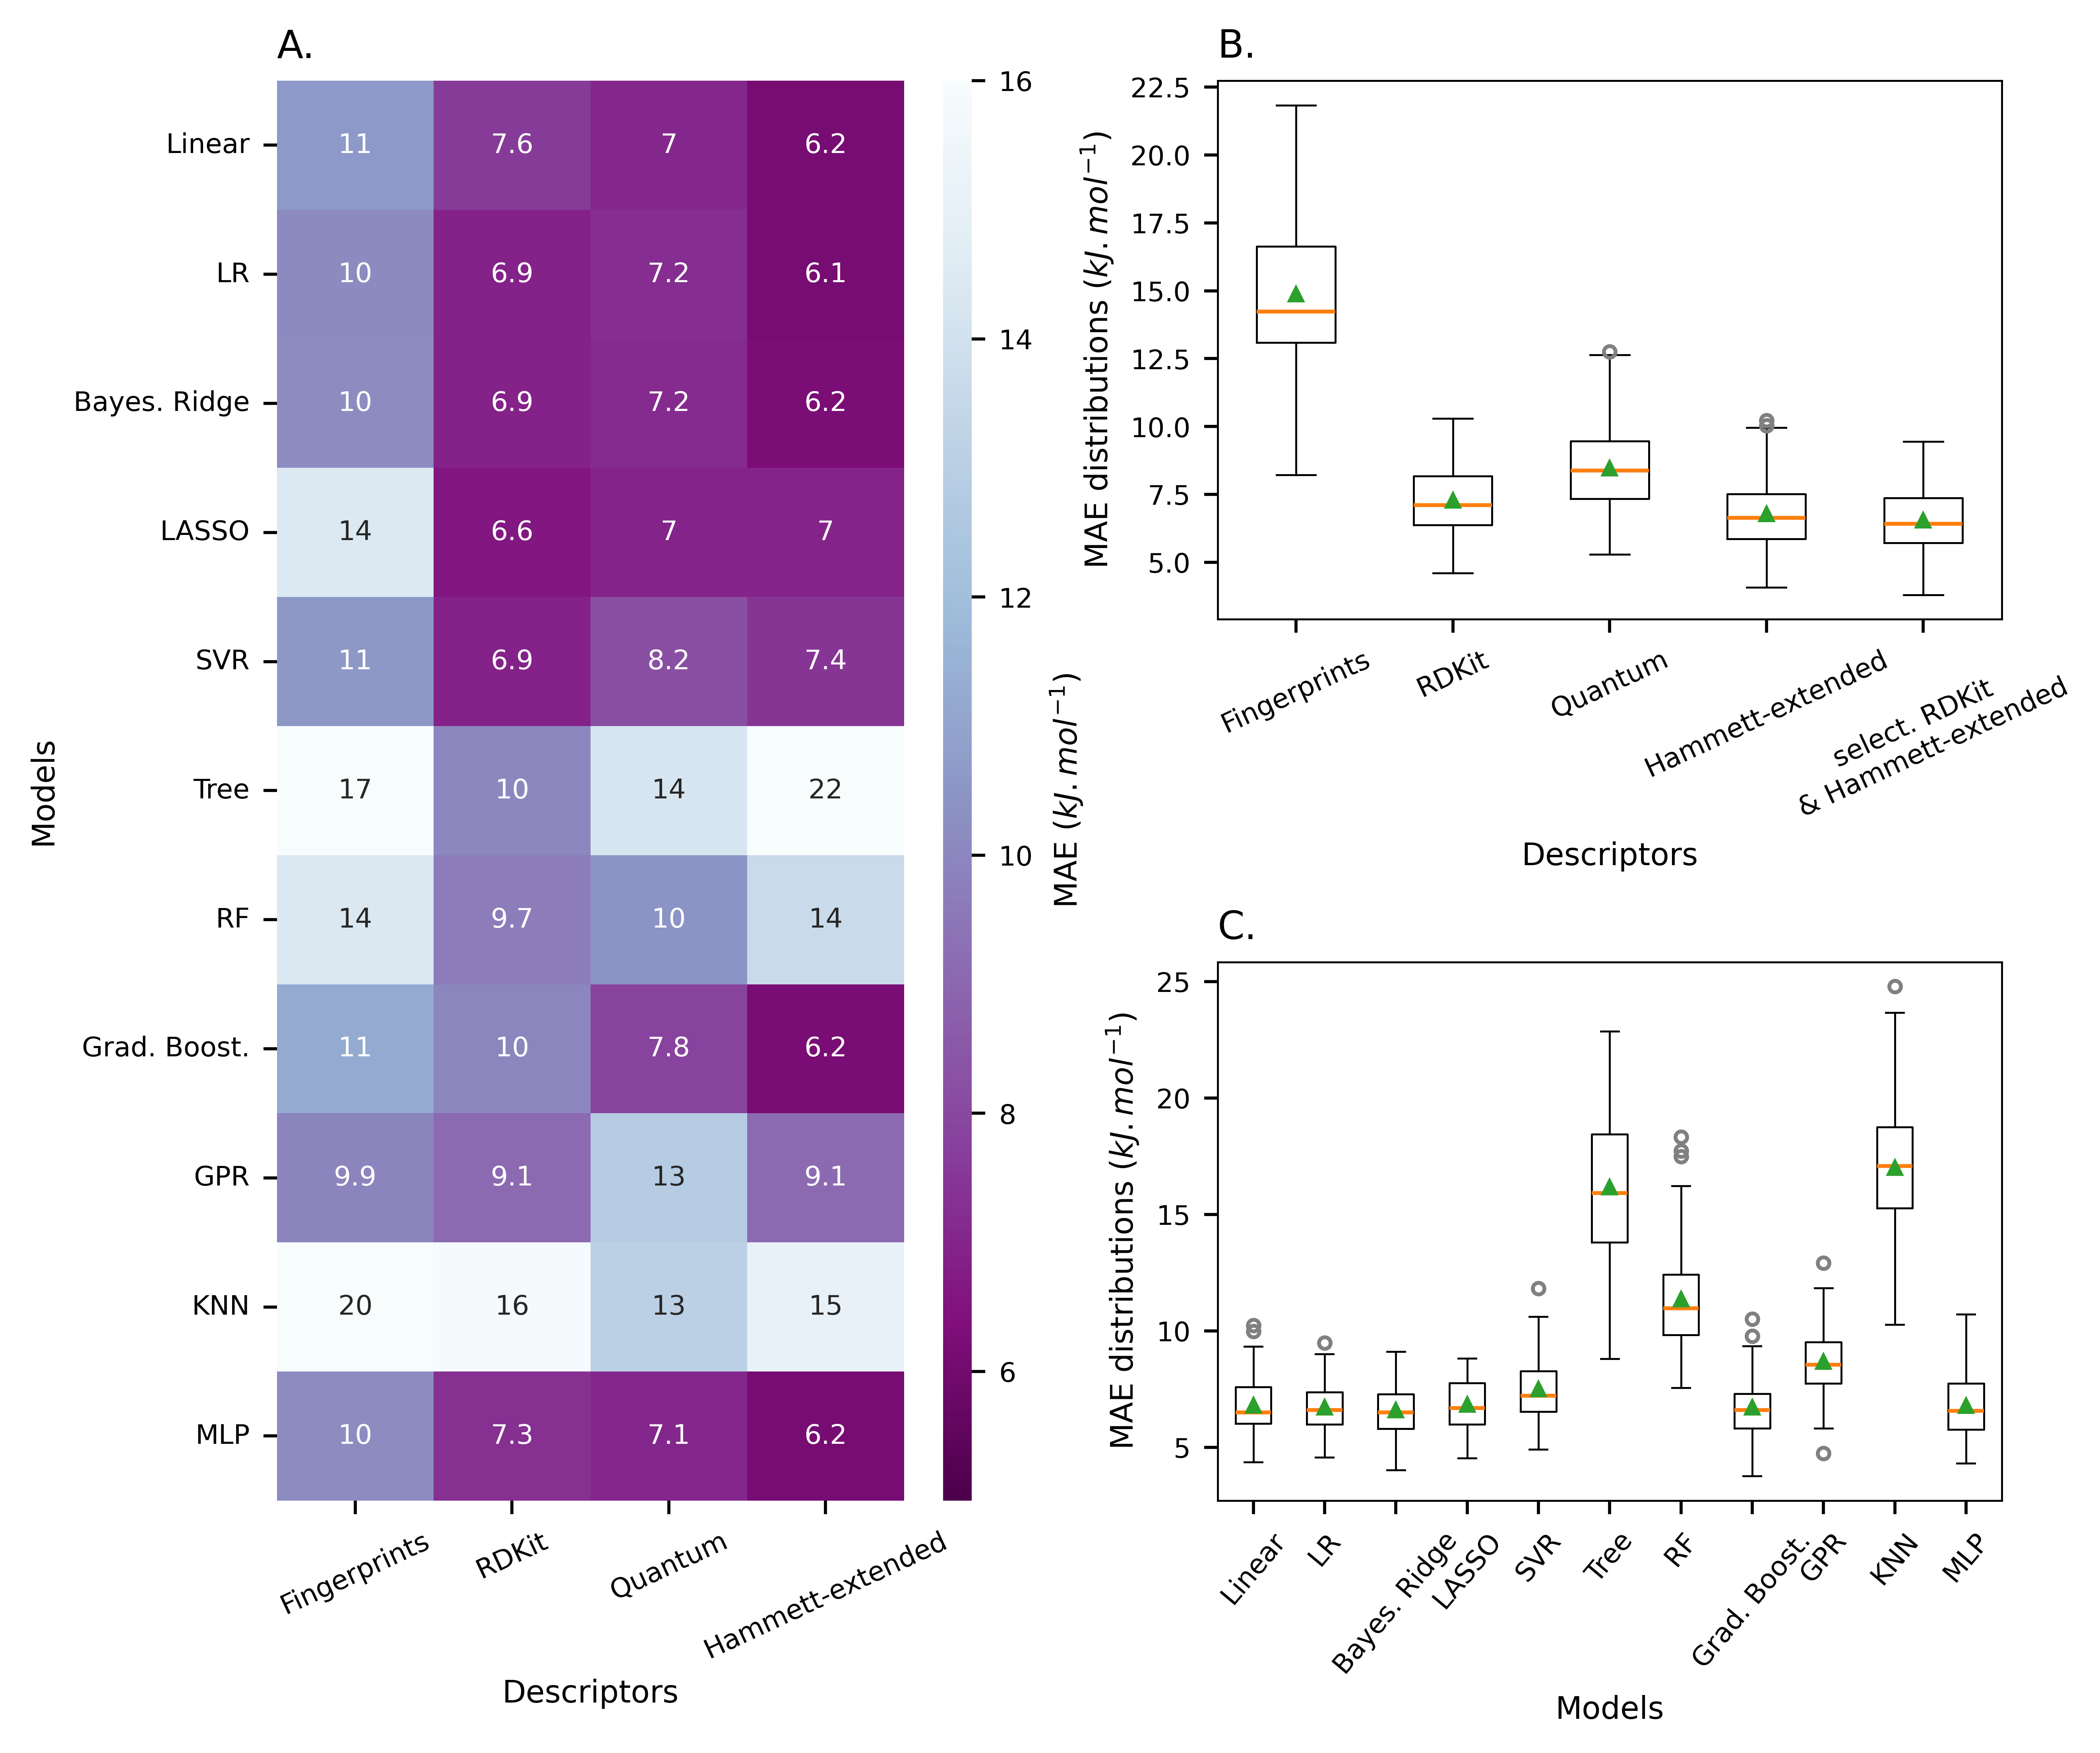

In [16]:
fig = plt.figure(figsize = (8, 8))

## heatmap ##

#ax1 = fig.add_subplot(1, 3, 1)
#sns.cubehelix_palette(as_cmap=True)

ax1 = plt.subplot2grid((6, 2), (0, 0), rowspan = 5)

ax2 = plt.subplot2grid((6, 2), (0, 1), rowspan = 2)
ax3 = plt.subplot2grid((6, 2), (3, 1), rowspan = 2)


heatmap = sns.heatmap(df_eval.T, ax=ax1, cmap = 'BuPu_r',annot = True, fmt='.2g', vmin = 5, vmax = 16, cbar=False)
ax1.set(xlabel = 'Descriptors')
ax1.tick_params(axis = 'x',rotation=25)
ax1.set(ylabel = 'Models')
ax1.tick_params(axis = 'y',rotation=0)
cbar = fig.colorbar(heatmap.get_children()[0], ax=ax1, aspect = 50)
cbar.set_label('MAE ($kJ.mol^{-1}$)')
cbar.outline.set_visible(False)

ax1.set_title("A.", loc='left', fontsize =10)


## 1ere boxplot ##

boxprops = dict(linewidth=0.5)
whiskerprops = dict(linewidth=0.5)
capprops = dict(linewidth=0.5)
flierprops = dict(markersize = 3, markeredgecolor='grey')
meanprops = dict(markersize = 3)

df=pd.read_csv('../results/benchmark_ML_models_descriptors/MAEs_Ridge_descriptors.csv').set_index('Descriptors')
descriptors=df.index
MAEs=[]
for desc in descriptors:
    MAEs.append(df.loc[desc])




box1 = ax2.boxplot(MAEs, labels=descriptors, showmeans=True, vert = True, 
                   boxprops = boxprops, whiskerprops = whiskerprops, 
                   capprops=capprops, flierprops = flierprops, meanprops = meanprops)


ax2.tick_params(axis = 'x',rotation=25)
ax2.set_xlabel('Descriptors')
ax2.set_ylabel('MAE distributions ($kJ.mol^{-1}$)')

ax2.set_title("B.", loc='left', fontsize =10)


## 2eme boxplot ##

df = pd.read_csv('../results/benchmark_ML_models_descriptors/MAEs_hammett_models.csv').set_index('Models')
models=df.index
MAEs=[]
for model in models:
    MAEs.append(df.loc[model])




box2 = ax3.boxplot(MAEs, labels=models, showmeans=True, vert = True, boxprops = boxprops, whiskerprops = whiskerprops, 
                   capprops=capprops, flierprops = flierprops, meanprops = meanprops)

ax3.tick_params(axis = 'x',rotation=50)
ax3.set_xlabel('Models')
ax3.set_ylabel('MAE distributions ($kJ.mol^{-1}$)')

ax3.set_title("C.", loc='left', fontsize =10)


fig.savefig('../results/benchmark_ML_models_descriptors/benchmarking_models_descriptors.png', transparent= True, facecolor='white', bbox_inches='tight')